# NUTS (Nomenclature of territorial units for statistics)

<https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts>

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import BadZipFile, ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "boundaries", "NUTS2021")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/"
    "ref-nuts-2021-01m.shp.zip"
)
KNOWN_HASH = None
FILE_NAME = "ref-nuts-2021-01m.shp.zip"

# file name for the GeoPackage where the boundary vector layer will be saved
GPKG_BOUNDARY = os.path.join("data", "boundaries.gpkg")

DATA_DIR_TEMP = os.path.join(DATA_DIR, "temp")

os.makedirs(DATA_DIR_TEMP, exist_ok=True)

DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

In [5]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-8]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: 4d51d3778405a528573707d8318bf1cbfd1b0386a2fa69873524c2e6420f740b
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [7]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_3035.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_3857.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_4326.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_3.shp.zip',
 'NUTS_LB_2021_3035.shp.zip',
 'NUTS_LB_2021_3035_LEVL_0.shp.zip',
 'NUTS_LB_2021_3035_LEVL_1.shp.zip',
 'NUTS_LB_2021_3035_LEVL_2.shp.zip',
 'NUTS_LB_2021_3035_LEVL_3.shp.zip',
 'NUTS_LB_2021_3857.shp.zip',
 'NUTS_LB_2021_3857_LEVL_0.shp.zip',
 'NUTS_LB_2021_3857_LEVL_1.shp.zip',
 'NUTS_LB_2021_3857_LEVL_2.shp.zip',
 'NUTS_LB_2021_3857_LEVL_3.shp.zip',
 'NUTS_LB_2021_4326.shp.zip',
 'NUTS_LB_2021_4326_

In [8]:
# extract the archive
try:
    z = ZipFile(DATA_FILE)
    z.extractall(DATA_DIR_TEMP)
except BadZipFile:
    print("There were issues with the file", DATA_FILE)

In [3]:
DATA_FILE = os.path.join(DATA_DIR_TEMP, "NUTS_RG_01M_2021_4326_LEVL_1.shp.zip")

In [6]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_4326_LEVL_1.cpg',
 'NUTS_RG_01M_2021_4326_LEVL_1.dbf',
 'NUTS_RG_01M_2021_4326_LEVL_1.prj',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp',
 'NUTS_RG_01M_2021_4326_LEVL_1.shx']

In [4]:
nuts = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_1.shp")

In [5]:
nuts.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CY0,1,CY,Kýpros,Κύπρος,0,0,0,CY0,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35..."
1,DEA,1,DE,Nordrhein-Westfalen,Nordrhein-Westfalen,0,0,0,DEA,"POLYGON ((8.70301 52.50044, 8.69906 52.48690, ..."
2,CH0,1,CH,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,0,0,0,CH0,"POLYGON ((8.61383 47.80108, 8.62155 47.79372, ..."
3,FRE,1,FR,Hauts-de-France,Hauts-de-France,0,0,0,FRE,"MULTIPOLYGON (((2.60704 50.91269, 2.60665 50.9..."
4,BG3,1,BG,Severna i Yugoiztochna Bulgaria,Северна и Югоизточна България,0,0,0,BG3,"POLYGON ((22.67516 44.21566, 22.69084 44.20456..."


In [7]:
nuts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
nuts = nuts[nuts["NUTS_ID"].str.contains("IE0|UKN")]

In [9]:
nuts

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
67,IE0,1,IE,Ireland,Ireland,0,0,0,IE0,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
82,UKN,1,UK,Northern Ireland,Northern Ireland,0,0,0,UKN,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."


In [10]:
nuts.total_bounds.round(2)

array([-10.66,  51.42,  -5.43,  55.44])

## Island of Ireland boundary

In [11]:
ie = nuts.copy()

In [12]:
ie = ie.dissolve(by="LEVL_CODE", as_index=False)

In [13]:
ie = ie[["geometry"]]

In [14]:
ie = ie.assign(NAME="Ireland")

In [15]:
DESCRIPTION = (
    "Boundary for the Island of Ireland generated using NUTS 2021 Level 1 "
    "boundaries"
)

ie = ie.assign(DESCRIPTION=DESCRIPTION)

In [16]:
ie

,geometry,NAME,DESCRIPTION
0,"MULTIPOLYGON (((-10.18425 51.60914, -10.17367 ...",Ireland,Boundary for the Island of Ireland generated u...


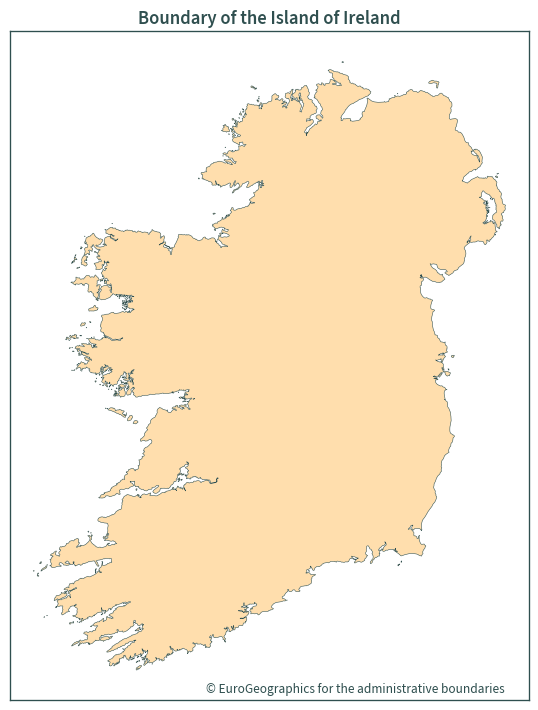

In [17]:
ie.plot(
    color="navajowhite", figsize=(7.5, 7.5),
    edgecolor="darkslategrey", linewidth=.4
)

plt.title("Boundary of the Island of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)
plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

In [18]:
ie.to_file(GPKG_BOUNDARY, layer="NUTS_RG_01M_2021_4326_IE")